In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pi = np.pi

# Chapter 3<br>Interpolation

## 3.3 Chebyshev Interpolation

In [3]:
def Newton(point):
    points = np.array(point)
    n = len(points)
    coef_array = np.zeros(n)
    
    def coef(points):
        if len(points) == 1:
            return points[0, 1]
        return (coef(points[1:]) - coef(points[:-1])) / (points[-1, 0] - points[0, 0])

    for i in range(n):
        coef_array[i] = coef(points[:i+1])
    
    def f(x):
        y = 0
        for i in range(n):
            x_i = 1
            for k in range(0, i):
                x_i *= (x - points[k, 0])
            y += coef_array[i] * x_i
        return y
    
    return f

In [4]:
def chebyshev(n):
    return np.array([np.cos((2*i + 1)*pi/(2*n)) for i in range(n)])

### Q. 1

In [5]:
f_domain = (chebyshev(4) + 1)*(pi/4)
f_image = np.sin(f_domain)

def sin2(x):
    x_0 = np.mod(x, 2*pi)
    sgn = 1
    
    if x_0 > pi:
        x_0 -= pi
        sgn = -1
    if x_0 > pi/2:
        x_0 = pi - x_0
        
    return sgn * Newton(np.array([f_domain, f_image]).T)(x_0)

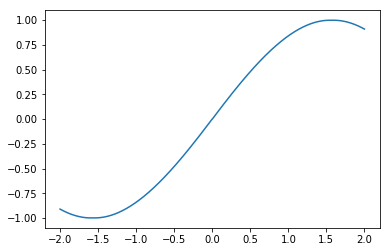

In [6]:
x_range = np.linspace(-2, 2, 1000)
y_range = [sin2(x) for x in x_range]

plt.plot(x_range, y_range)
plt.show()

### Q. 2

In [7]:
# According to Ex 3.12, we need 10 Chebyshev base points in order for the function to be correct for 10 decimals.
f_domain = (chebyshev(10) + 1)*(pi/4)
f_image = np.cos(f_domain)

def cos2(x):
    x_0 = np.mod(x, 2*pi)
    sgn = 1
    
    if x_0 > pi:
        x_0 -= pi
        sgn *= -1
    if x_0 > pi/2:
        x_0 = pi - x_0
        sgn *= -1
        
    return sgn * Newton(np.array([f_domain, f_image]).T)(x_0)

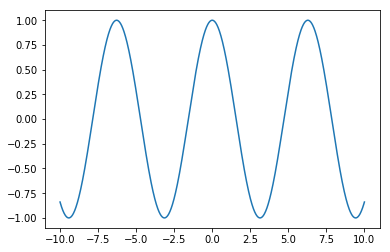

In [8]:
x_range = np.linspace(-10, 10, 1000)
y_range = [cos2(x) for x in x_range]

plt.plot(x_range, y_range)
plt.show()

### Q. 3

In [9]:
n = 25
error = ((np.e - 1)/2)**n / (n * 2**(n-1))
print(error)

5.3573514256539735e-11


In [10]:
f_domain = (chebyshev(25) + 1)*(np.e - 1)/2 + 1
f_image = np.log(f_domain)

def ln1(x):
    sgn = 1
    n = 0
    
    if x < 1:
        x = 1/x
        sgn *= -1
    while x > np.e:
        x /= np.e
        n += 1    
    
    return sgn * (Newton(np.array([f_domain, f_image]).T)(x) + n)

In [ ]:
# Too slow.
x_range = np.linspace(1e-4, 1e+4, 1000)
y_range = [ln1(x) for x in x_range]

plt.plot(x_range, y_range)
plt.show()

In [ ]:
# Too slow.
max_error = 0
for x in x_range:
    error = abs(np.log(x) - ln1(x))
    if error > max_error:
        max_error = error

print(max_error)

### Q. 4

In [11]:
def exp_abs1(x, domain):
    return Newton(np.array([domain, np.exp(abs(domain))]).T)(x)

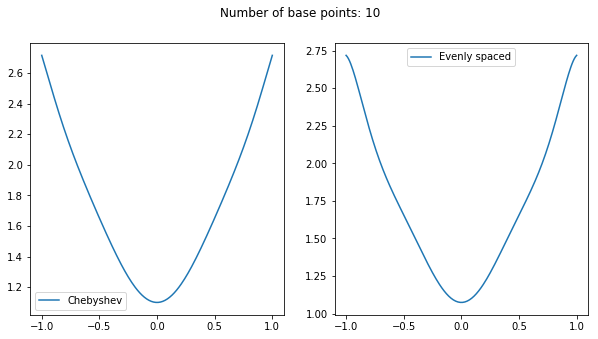

In [12]:
n = 10

x_range = np.arange(-1, 1.01, 0.01)

plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
ax1.plot(x_range, exp_abs1(x_range, chebyshev(n)), label="Chebyshev")
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(x_range, exp_abs1(x_range, np.linspace(-1, 1, n)), label="Evenly spaced")
ax2.legend()

plt.suptitle("Number of base points: 10")
plt.show()

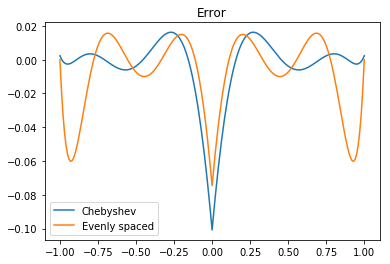

In [13]:
plt.plot(x_range, np.exp(abs(x_range)) - exp_abs1(x_range, chebyshev(n)), label="Chebyshev")
plt.plot(x_range, np.exp(abs(x_range)) - exp_abs1(x_range, np.linspace(-1, 1, n)), label="Evenly spaced")
plt.legend()
plt.title("Error")

plt.show()

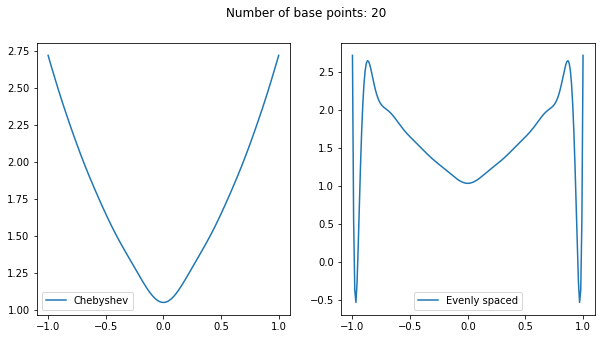

In [14]:
n = 20

x_range = np.arange(-1, 1.01, 0.01)

plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
ax1.plot(x_range, exp_abs1(x_range, chebyshev(n)), label="Chebyshev")
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(x_range, exp_abs1(x_range, np.linspace(-1, 1, n)), label="Evenly spaced")
ax2.legend()

plt.suptitle("Number of base points: 20")
plt.show()

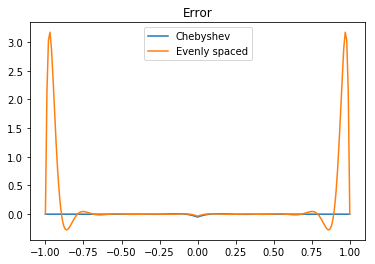

In [15]:
plt.plot(x_range, np.exp(abs(x_range)) - exp_abs1(x_range, chebyshev(n)), label="Chebyshev")
plt.plot(x_range, np.exp(abs(x_range)) - exp_abs1(x_range, np.linspace(-1, 1, n)), label="Evenly spaced")
plt.legend()
plt.title("Error")

plt.show()

In evenly spaced base points case, Runge phenomenon has occured.

### Q. 5

In [16]:
def exp1(x, domain):
    return Newton(np.array([domain, np.exp(-domain**2)]).T)(x)

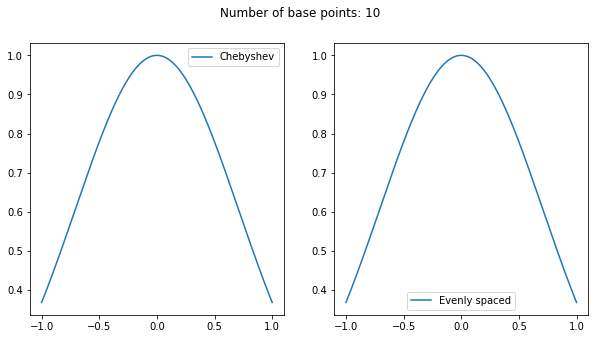

In [17]:
n = 10

x_range = np.arange(-1, 1.01, 0.01)

plt.figure(figsize=(10, 5))
ax1 = plt.subplot(121)
ax1.plot(x_range, exp1(x_range, chebyshev(n)), label="Chebyshev")
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(x_range, exp1(x_range, np.linspace(-1, 1, n)), label="Evenly spaced")
ax2.legend()

plt.suptitle("Number of base points: 10")
plt.show()

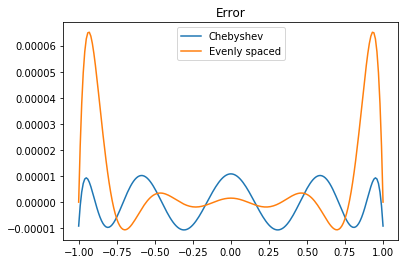

In [18]:
plt.plot(x_range, np.exp(-x_range**2) - exp1(x_range, chebyshev(n)), label="Chebyshev")
plt.plot(x_range, np.exp(-x_range**2) - exp1(x_range, np.linspace(-1, 1, n)), label="Evenly spaced")
plt.legend()
plt.title("Error")

plt.show()

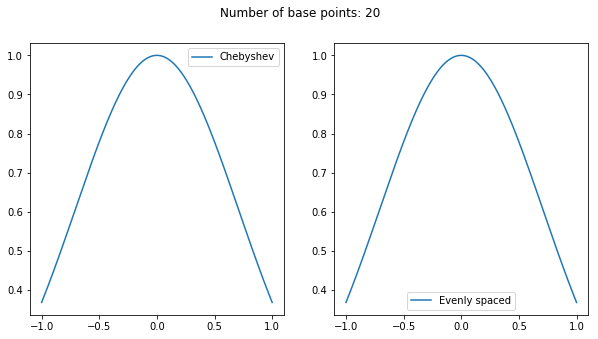

In [19]:
n = 20

x_range = np.arange(-1, 1.01, 0.01)

plt.figure(figsize=(10, 5))
ax1 = plt.subplot(121)
ax1.plot(x_range, exp1(x_range, chebyshev(n)), label="Chebyshev")
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(x_range, exp1(x_range, np.linspace(-1, 1, n)), label="Evenly spaced")
ax2.legend()

plt.suptitle("Number of base points: 20")
plt.show()

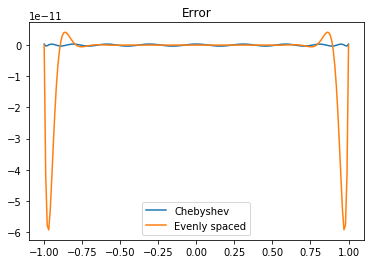

In [20]:
plt.plot(x_range, np.exp(-x_range**2) - exp1(x_range, chebyshev(n)), label="Chebyshev")
plt.plot(x_range, np.exp(-x_range**2) - exp1(x_range, np.linspace(-1, 1, n)), label="Evenly spaced")
plt.legend()
plt.title("Error")

plt.show()

In evenly spaced base points case, Runge phenomenon has occured.